У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../data/yulu_rental.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

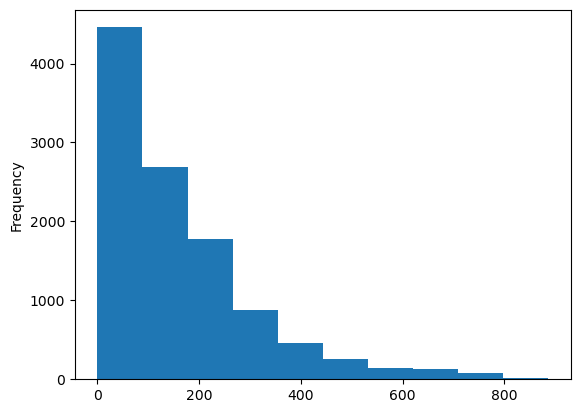

In [21]:
df['registered'].plot(kind='hist')
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

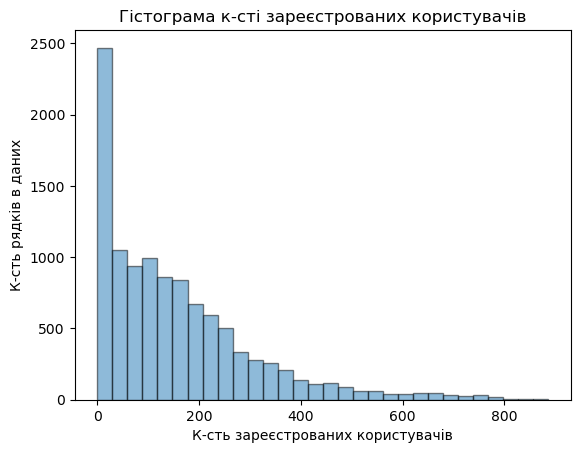

In [23]:
df['registered'].plot(kind='hist', bins=30, alpha=0.5, edgecolor='black')
plt.title('Гістограма к-сті зареєстрованих користувачів')
plt.xlabel('К-сть зареєстрованих користувачів')
plt.ylabel('К-сть рядків в даних')
plt.show()

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [25]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [27]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [29]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [53]:
zero_registered_users = df[df['registered'] == 0]
grouped_by_day = zero_registered_users.groupby('dayofweek').size()

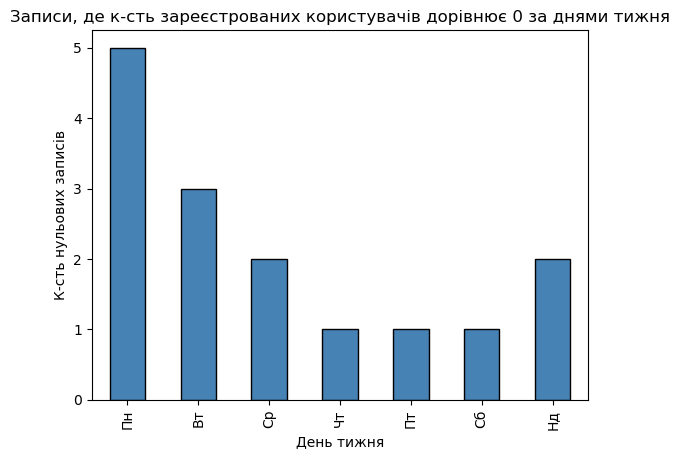

In [55]:
grouped_by_day.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Записи, де к-сть зареєстрованих користувачів дорівнює 0 за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('К-сть нульових записів')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'])
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [57]:
grouped_by_weather = df.groupby('weather')['registered'].sum()

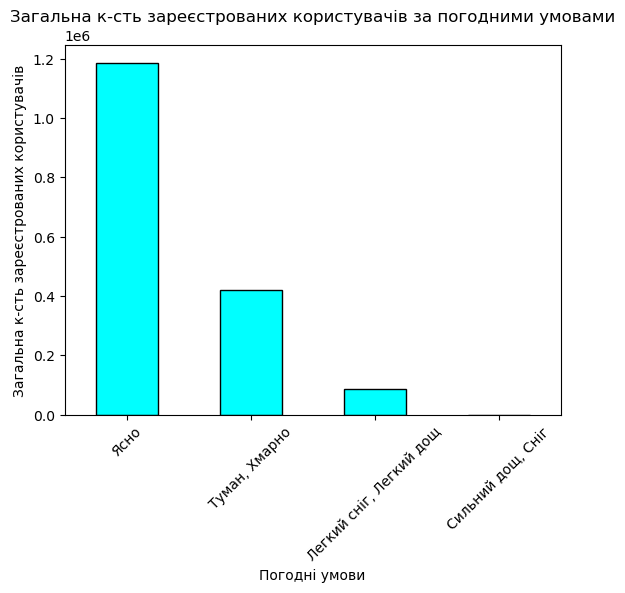

In [97]:
grouped_by_weather.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Загальна к-сть зареєстрованих користувачів за погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Загальна к-сть зареєстрованих користувачів')
plt.xticks(ticks=range(4), labels=['Ясно', 'Туман, Хмарно', 'Легкий сніг, Легкий дощ', 'Сильний дощ, Сніг'], rotation=45)
plt.show()

Так, отримані дані мають логічний сенс, адже чим кращі погодні умови, тим більша к-сть зареєстрованих користувачів

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

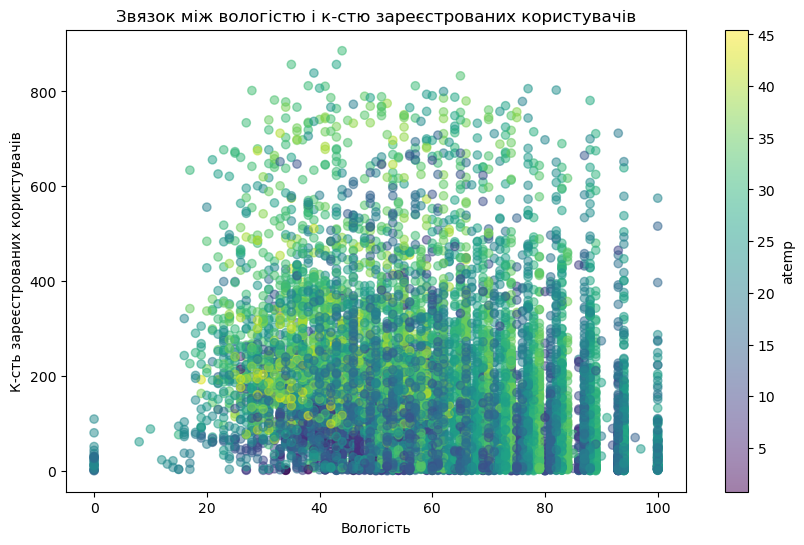

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['registered'], c=df['atemp'], cmap='viridis', alpha=0.5)
plt.title('Звязок між вологістю і к-cтю зареєстрованих користувачів')
plt.xlabel('Вологість')
plt.ylabel('К-сть зареєстрованих користувачів')
cbar = plt.colorbar()
cbar.set_label('atemp')
plt.show()

Бачимо, що переважна к-сть зареєстрованих користувачів здійснювали поїздки за вологості в діапазоні 20-90%, а також при температурі за відчуттями до 30 градусі. Також можемо прослідкувати певну тенденцію - при високій температурі (40-45) і нижчій вологості (20-60) є попит на користування електровелосипедами через комфортніші погодні умови для їзди

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)